In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

In [3]:
cmap_map = 'plasma'

## Data access

The data to make these plots can currently be downloaded with the following command:

wget --no-check-certificate https://cosmo.nyu.edu/ksf/files/<filename\>
    
The file names are:
- catalog_G20.0.fits
- catalog_G20.5.fits
- random_G20.0_10x.fits
- random_G20.5_10x.fits
- selection_function_NSIDE64_G20.0.fits
- selection_function_NSIDE64_G20.5.fits

## Load data from local machine

In [4]:
fn_gcatlo = f'../data/catalog_G20.0.fits'
fn_gcathi = f'../data/catalog_G20.5.fits'

fn_sello = f"../data/maps/selection_function_NSIDE64_G20.0.fits"
fn_selhi = f"../data/maps/selection_function_NSIDE64_G20.5.fits"

fn_randlo = f'../data/randoms/random_G20.0_10x.fits'
fn_randhi = f'../data/randoms/random_G20.5_10x.fits'

## Parameters

In [5]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [6]:
G_max = 20.5 # choices are G20.0 and G20.5
assert G_max in [20.0, 20.5]

## Quasar catalog

In [7]:
tab_gcatlo = Table.read(fn_gcatlo)
N_gcatlo = len(tab_gcatlo)
print(f"Number of data sources: {N_gcatlo}")

Number of data sources: 755850


In [8]:
print(f"Column names: {tab_gcatlo.columns}")

Column names: <TableColumns names=('source_id','ra','dec','l','b','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','phot_g_n_obs','phot_bp_n_obs','phot_rp_n_obs','redshift_qsoc','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','pmra','pmra_error','pmdec','pmdec_error','parallax','parallax_error','ebv','A_v','pm','mag_w1_vg','mag_w2_vg','unwise_objid','rand_ints','g_rp','bp_g','bp_rp','g_w1','w1_w2','redshift_spz_raw','redshift_spz_err','redshift_spz')>


In [9]:
tab_gcathi = Table.read(fn_gcathi)
N_gcathi = len(tab_gcathi)
print(f"Number of data sources: {N_gcathi}")

Number of data sources: 1295502


### Make map of quasar number counts

In [10]:
pixel_indices_gcatlo = hp.ang2pix(NSIDE, tab_gcatlo['ra'], tab_gcatlo['dec'], lonlat=True)
map_gcatlo = np.bincount(pixel_indices_gcatlo, minlength=NPIX)

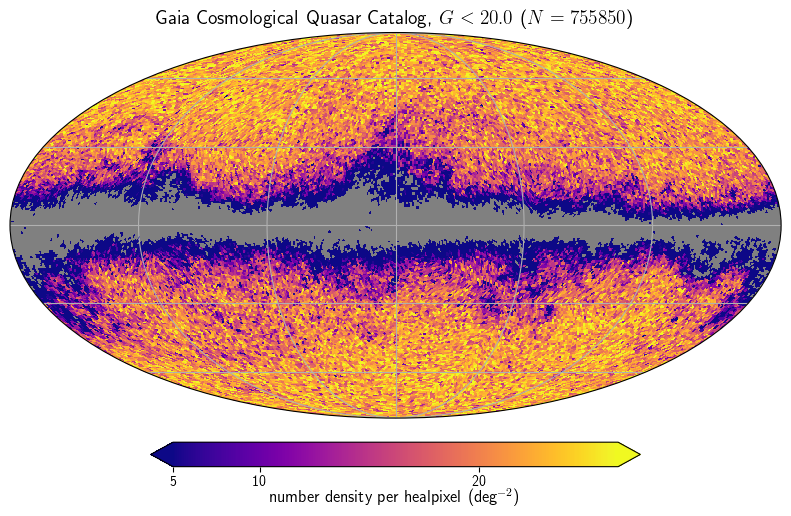

In [11]:
projview(map_gcatlo, title=rf"Gaia Cosmological Quasar Catalog, $G<20.0$ ($N={N_gcatlo}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcatlo)-np.std(map_gcatlo), max=np.median(map_gcatlo)+1.5*np.std(map_gcatlo), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20]) 

In [12]:
pixel_indices_gcathi = hp.ang2pix(NSIDE, tab_gcathi['ra'], tab_gcathi['dec'], lonlat=True)
map_gcathi = np.bincount(pixel_indices_gcathi, minlength=NPIX)

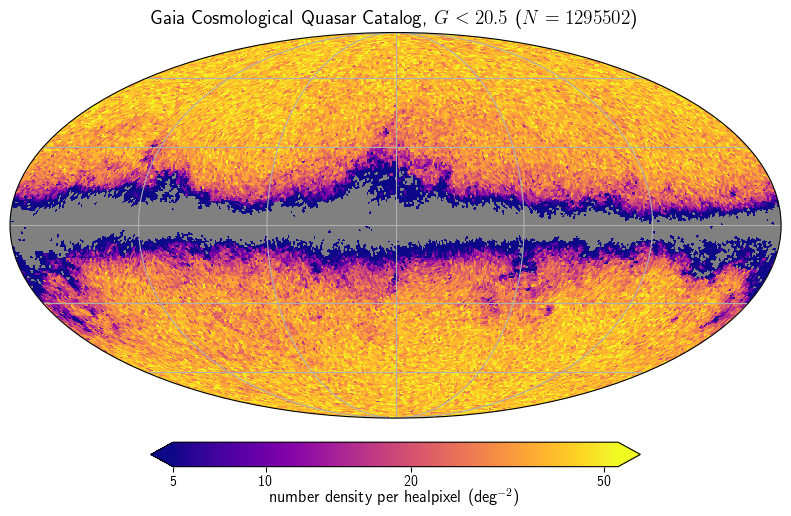

In [13]:
projview(map_gcathi, title=rf"Gaia Cosmological Quasar Catalog, $G<20.5$ ($N={N_gcathi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_gcathi)-1.5*np.std(map_gcathi), max=np.median(map_gcathi)+1.5*np.std(map_gcathi), 
            norm='log', graticule=True,
            cbar_ticks=[5, 10, 20, 50]) 

## Selection function model

In [14]:
map_sello = hp.read_map(fn_sello)

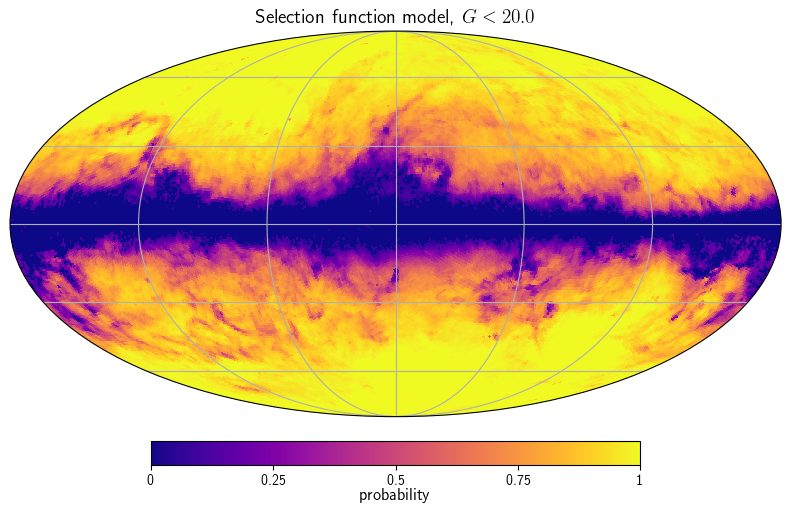

In [15]:
projview(map_sello, title=rf"Selection function model, $G<20.0$",
            unit=r"probability", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            cbar_ticks=[0,0.25,0.5,0.75,1.0]
            ) 

In [16]:
map_selhi = hp.read_map(fn_selhi)

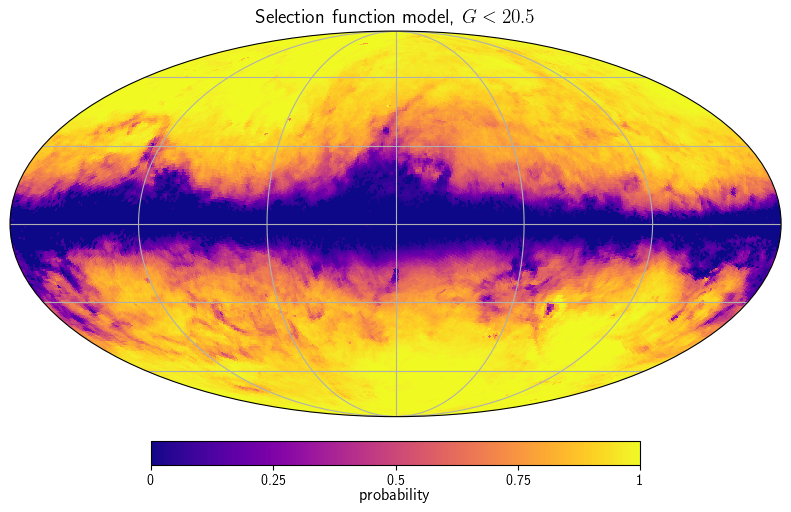

In [17]:
projview(map_selhi, title=rf"Selection function model, $G<20.5$",
            unit=r"probability", cmap=cmap_map, coord=['C', 'G'], 
            graticule=True,
            cbar_ticks=[0,0.25,0.5,0.75,1.0]
            ) 

## Random catalog

In [18]:
tab_randlo = Table.read(fn_randlo)
N_randlo = len(tab_randlo)
print(f"Number of random sources: {N_randlo}")

Number of random sources: 7580480


In [19]:
print(f"Column names: {tab_randlo.columns}")

Column names: <TableColumns names=('ra','dec','ebv')>


In [20]:
tab_randhi = Table.read(fn_randhi)
N_randhi = len(tab_randhi)
print(f"Number of random sources: {N_randhi}")

Number of random sources: 13014046


### Make maps of random number counts

In [21]:
pixel_indices_randlo = hp.ang2pix(NSIDE, tab_randlo['ra'], tab_randlo['dec'], lonlat=True)
map_randlo = np.bincount(pixel_indices_randlo, minlength=NPIX)

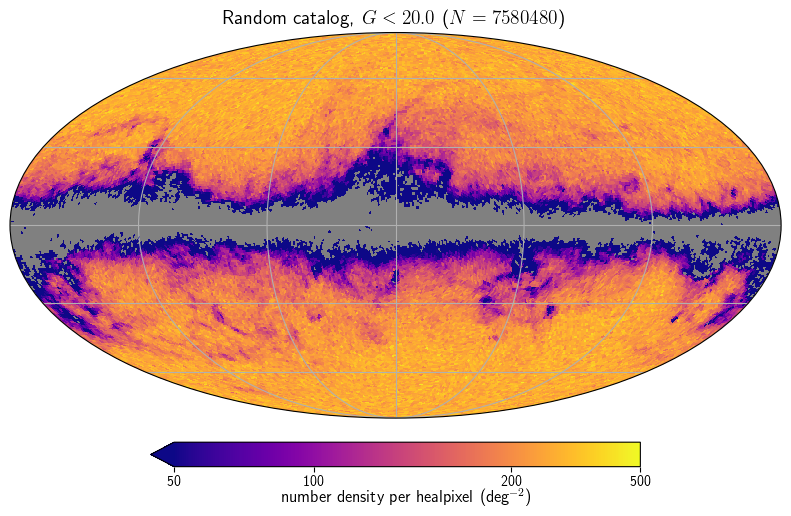

In [22]:
projview(map_randlo, title=rf"Random catalog, $G<20.0$ ($N={N_randlo}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randlo)-1.5*np.std(map_randlo), max=np.median(map_randlo)+1.5*np.std(map_randlo), 
            norm='log', graticule=True,
            cbar_ticks=[50, 100, 200, 500]) 

In [23]:
pixel_indices_randhi = hp.ang2pix(NSIDE, tab_randhi['ra'], tab_randhi['dec'], lonlat=True)
map_randhi = np.bincount(pixel_indices_randhi, minlength=NPIX)

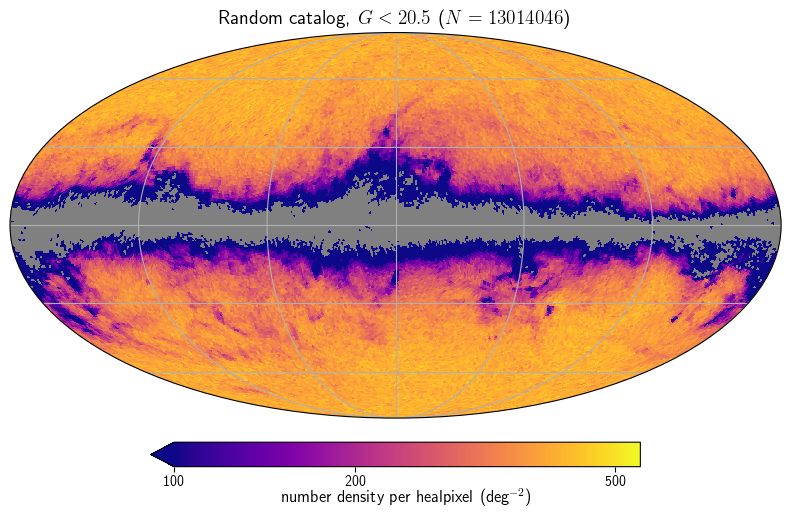

In [24]:
projview(map_randhi, title=rf"Random catalog, $G<20.5$ ($N={N_randhi}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap=cmap_map, coord=['C', 'G'], 
            min=np.median(map_randhi)-1.5*np.std(map_randhi), max=np.median(map_randhi)+1.5*np.std(map_randhi), 
            norm='log', graticule=True,
            cbar_ticks=[100, 200, 500]) 

In [25]:
norm_factor = N_gcatlo/N_randlo
i_nonzero = np.abs(map_gcatlo)>1e-8
map_residuals_lo = np.full(len(map_randlo), np.nan)
map_residuals_lo[i_nonzero] = norm_factor*map_randlo[i_nonzero]/map_gcatlo[i_nonzero] - 1

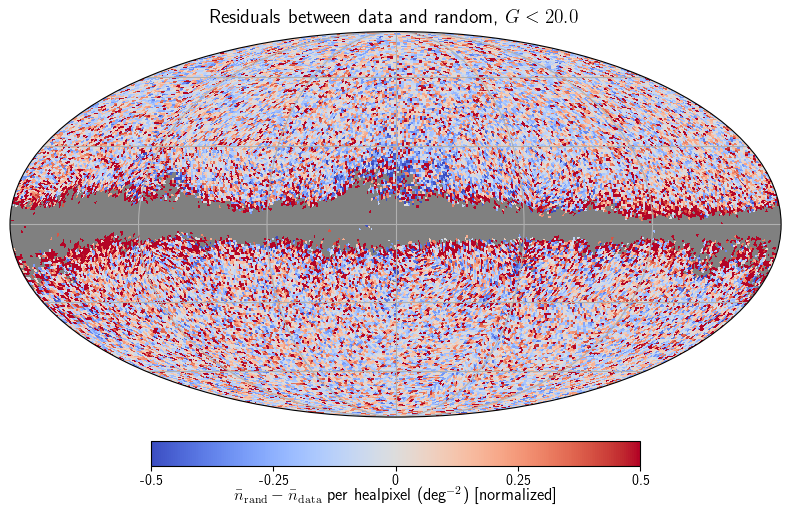

In [26]:
projview(map_residuals_lo, title=rf"Residuals between data and random, $G<20.0$",
            unit=r"$\bar{n}_\mathrm{rand} - \bar{n}_\mathrm{data}$ per healpixel (deg$^{-2}$) [normalized]", 
            cmap='coolwarm', coord=['C', 'G'], 
            min=-0.5, max=0.5, graticule=True,
            cbar_ticks=[-0.5, -0.25, 0, 0.25, 0.5]) 

In [27]:
norm_factor = N_gcathi/N_randhi
i_nonzero = np.abs(map_gcathi)>1e-8
map_residuals_hi = np.full(len(map_randhi), np.nan)
map_residuals_hi[i_nonzero] = norm_factor*map_randhi[i_nonzero]/map_gcathi[i_nonzero] - 1

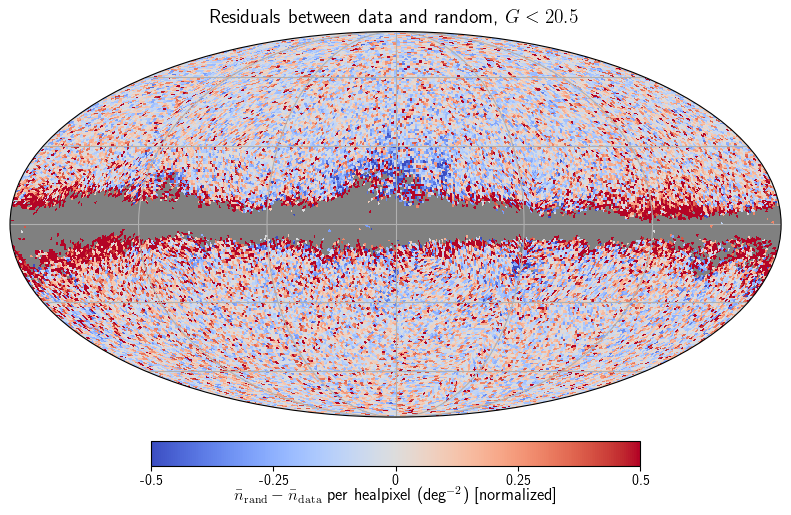

In [28]:
projview(map_residuals_hi, title=rf"Residuals between data and random, $G<20.5$",
            unit=r"$\bar{n}_\mathrm{rand} - \bar{n}_\mathrm{data}$ per healpixel (deg$^{-2}$) [normalized]", 
            cmap='coolwarm', coord=['C', 'G'], 
            min=-0.5, max=0.5, graticule=True,
            cbar_ticks=[-0.5, -0.25, 0, 0.25, 0.5]) 